In [12]:
%matplotlib inline

In [60]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.xarray

sns.set(style='ticks', context='notebook', palette='colorblind',font_scale=1.5)
mpl.rc('figure', dpi=100, figsize=[11, 5])
mpl.rc('savefig', dpi=500, bbox='tight')
mpl.rc('legend', frameon=False)

In [180]:
dat = xr.open_mfdataset('combinations_lt_10_*.nc',concat_dim='clusters',)

/usr/local/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


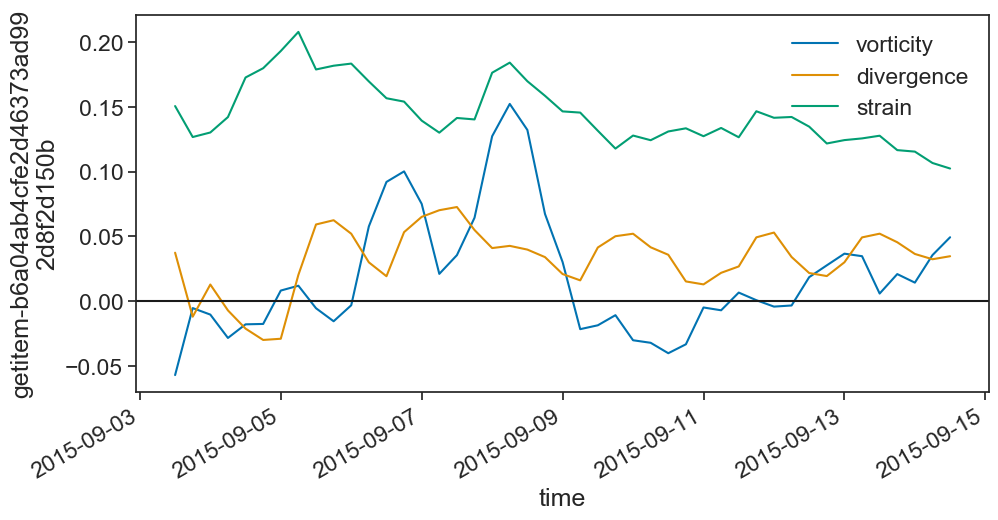

In [182]:
periods=4
dat.vort.rolling({'time':periods},center=True).mean().mean(axis=0).plot(label='vorticity')
dat.div.rolling({'time':periods},center=True).mean().mean(axis=0).plot(label='divergence')
dat.strain.rolling({'time':periods},center=True).mean().mean(axis=0).plot(label='strain')
plt.legend()
plt.axhline(0,color='k')

(1e-08, 10.0)

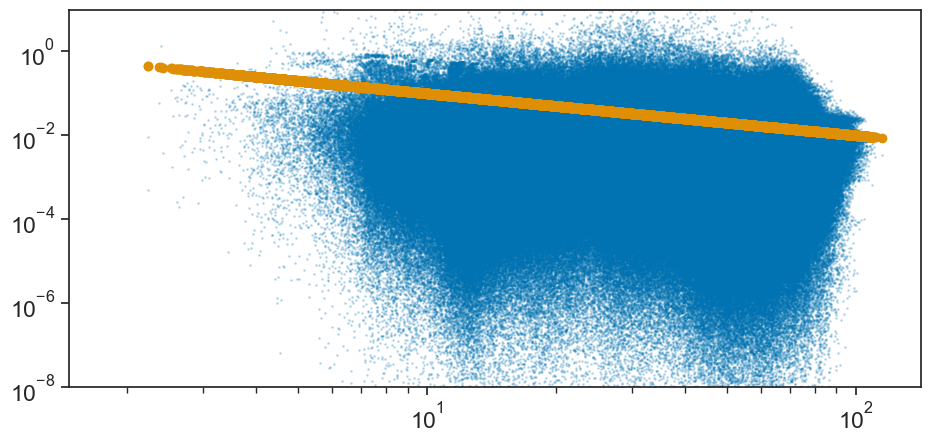

In [183]:
plt.scatter(dat.length,dat.vort**2,marker='o',s=1,alpha=0.2,rasterized=True)
plt.scatter(dat.length,dat.length**-1)
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-8,1e1)

In [184]:
dat['absvort'] = np.sqrt( dat.vort**2 )
dat['absdiv'] = np.sqrt( dat.div**2 )

In [202]:
grouped = dat.groupby_bins(dat.length,np.logspace(0,2,60)).mean()

/usr/local/anaconda3/lib/python3.7/site-packages/xarray/core/groupby.py:758: FutureWarning: Default reduction dimension will be changed to the grouped dimension in a future version of xarray. To silence this warning, pass dim=xarray.ALL_DIMS explicitly.
  allow_lazy=True, **kwargs)


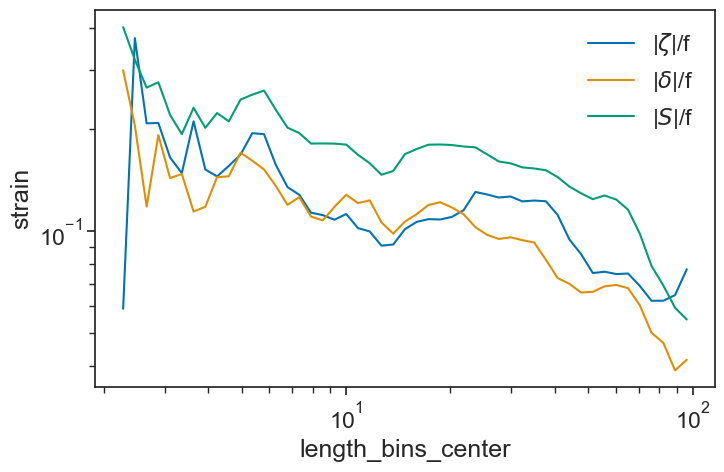

In [203]:
plt.figure(figsize=(8,5))
grouped.absvort.plot(label=r'|$\zeta$|/f')
grouped.absdiv.plot(label=r'|$\delta$|/f')
grouped.strain.plot(label=r'|$S$|/f')
# plt.plot(np.linspace(4,15),(np.linspace(4,15))**-1, color='k', lw=1)
# plt.plot(np.linspace(15,80),(0.2*np.linspace(15,80))**-1, color='k',lw=1)
plt.xscale('log')
plt.yscale('log')
plt.legend()